In [1]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt

In [2]:
# ns = [int(n) for n in np.logspace(1,3,8)]
n = 100
k = 20
lamda_scale = 1
scale = 1
e2s = [1e-3]#np.logspace(-8,2,20)
e1s = np.logspace(-5,-2,20)
title_str = f'spd_backward_error_n={n}_k={k}_lambda={lamda_scale}_e2={e2s[0]}'
num_experiments = 100

In [3]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    # np.random.seed(rand_seed)    \
    # add noise
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B-inv(B_inv_approx),ord=2)
    bound = 2*e1*norm(A,ord=2)**2
    full_bound = bound + 4*lamda*e2*(cond(V)*A_inv_B_norm+lamda*e1)**2
    return error,bound,full_bound


In [4]:
errors = np.zeros((len(e1s),len(e2s)),dtype=float)
bounds = np.zeros((len(e1s),len(e2s)),dtype=float)
full_bounds = np.zeros((len(e1s),len(e2s)),dtype=float)

A = np.random.normal(size=(n,n),scale= scale)
A = A@A.T # make A positive semidefinite
U = np.random.normal(size=(n,k))
U /= norm(U, ord=2)
V = U.copy()
sigma_min = np.min(np.linalg.svd(A,compute_uv=False))
lamda = lamda_scale*sigma_min
B = A + lamda*U@V.T
A_inv_B_norm = norm(inv(A)@B,ord=2)
for i,e1 in enumerate(e1s):
    for j,e2 in enumerate(e2s):
        e_ij = np.zeros(num_experiments); b_ij = np.zeros(num_experiments); f_ij = np.zeros(num_experiments)
        for t in range(num_experiments):
            e_ij[t],b_ij[t],f_ij[t] = compute_SMW(n,k,A,B,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2)
        errors[i,j] = np.mean(e_ij)
        bounds[i,j] = np.mean(b_ij)
        full_bounds[i,j] = np.mean(f_ij)
    # print("error = %f, bound = %f" %(errors[i],bounds[i]))

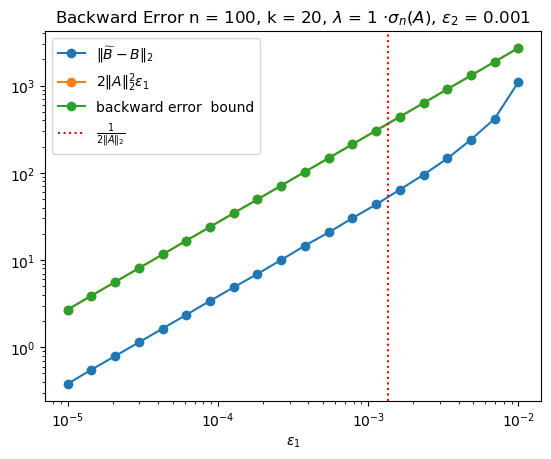

In [7]:
plt.loglog(e1s,errors[:,0],label=r'$\|\widetilde{B}-B\|_2$',marker='o')
plt.loglog(e1s,bounds[:,0],label=r'$2\|A\|_2^2 \epsilon_1$',marker='o')
plt.loglog(e1s,full_bounds[:,0],label='backward error  bound',marker='o')
plt.axvline(x=1/2/norm(A,ord=2),ls=':',color='red',label=r'$\frac{1}{2 \|A\|_2}$')
plt.legend()
plt.xlabel(r'$\epsilon_1$')
plt.title(f'Backward Error n = {n}, k = {k}, '+r'$\lambda$'+f' = {lamda_scale} '+r'$\cdot\sigma_{n}(A)$'+', '+r'$\epsilon_2$'+f' = {e2s[0]}')  
plt.savefig('spd/'+title_str+'.png')

In [6]:
for e1 in e1s:
    print(1/(8*(cond(V)*A_inv_B_norm+lamda*e1)**2),1/(2*(cond(V)*A_inv_B_norm+lamda*e1)))

0.012372687404226998 0.15730662671500523
0.01237268738573591 0.15730662659745717
0.012372687359137413 0.15730662642837023
0.012372687320876801 0.1573066261851471
0.012372687265840834 0.15730662583528282
0.012372687186674352 0.15730662533202058
0.012372687072797338 0.15730662460810313
0.012372686908990956 0.1573066235667841
0.012372686673363695 0.1573066220688989
0.012372686334425701 0.15730661991426617
0.012372685846880406 0.15730661681493507
0.01237268514557098 0.1573066123567028
0.012372684136772616 0.1573066059437595
0.012372682685666941 0.15730659671906286
0.012372680598324593 0.15730658344980095
0.01237267759578815 0.15730656436263651
0.01237267327679186 0.1573065369067151
0.012372667064136087 0.15730649741276478
0.0123726581275503 0.1573064406027312
0.012372645272736448 0.15730635888441666
